# **Name**: Rozi Hieromini Mlay <br>
# **Project**: Customer segmentation for Dodoma Fresh Milk Distributor <br>

## **Summary**<br>
###### The main objective of this project is to develop models that will help Dodoma Fresh Milk target the right customers.<br> The goal is to help Dodoma Fresh milk not only increase sales but also to become more efficient in allocating advertising spend.<br>


# **Problem Type**: Unsupervised learning<br>
###### The problem is unsupervised since it does not have labels(dependent variable). Unsupervised learning mainly deals with identifying the structure or pattern of the data, and in this problem Kmeans Algorithim is applied for clustering. This algorithm take in unlabelled data and assign each data point to clusters.


# Table of Contents

1. [Importing libraries](#Libraries)
2. [Loading Dataset](#dataset)
3. [EDA -Understanding the data](#eda)
4. [Visualizations](#viz)
5. [Feature Engineering](#process)
6. [Modeling Buildinga and Evaluation](#modeling)
7. [Interpretation and recomendations](#interpreatation)
8. [Conlusion](#conlusion)


<a name="Libraries"></a>
## Section 1: Importing libraries

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

<a name = "dataset"><a/>
## Section 2: Loading Dataset

Getting the data ready for processing by laoding the csv file using pandas library. The dataset was aploades to github to make it easy to load in Colab

In [2]:
#Load the data
data = pd.read_csv("https://raw.githubusercontent.com/RozieH/datasets/main/Take%20home%20project.csv")
data.head()

,Merchant Id,Annual Revenue (k$),Spending Score (1-100),City,Most Purchased Product
0,1,15,39,Mtwara,Mtindi 500ml
1,2,15,81,Zanzibar City,Fresh Milk 250ml
2,3,16,6,Mtwara,Mtindi 500ml
3,4,16,77,Zanzibar City,Fresh Milk 250ml
4,5,17,40,Mtwara,Mtindi 500ml


<a name = "eda"><a/>
## Section 3: EDA - Understanding the data
This sesction is to guide the understanding of the business context and the data, it also include the observations from the analysis.

In [3]:
# get a summary of how many rows in the dataset and how many missing values is in each column and the the data types of the variables
# the 'Non-Null Count' counts the number of values in each column that is not missing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Merchant Id             200 non-null    int64 
 1   Annual Revenue (k$)     200 non-null    int64 
 2   Spending Score (1-100)  200 non-null    int64 
 3   City                    200 non-null    object
 4   Most Purchased Product  200 non-null    object
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


**Observation**:<br>
1. There are 200 records in the dataset

2. There are 5 columns in the dataset

3. There are no missing values in the dataset

4. The dataset contain 3 variables of datatype interger and 2 variable od datatype object(categorical data)


In [4]:
#Statistical summaries for numeric data
data[["Annual Revenue (k$)","Spending Score (1-100)"]].describe()

,Annual Revenue (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


**Observation** <br>
1. The Average Annual Revenue for Dodoma Fesh Milk Merchants is $60.56k <br>
2. The mean Spending score for the Merchants is 50.2 out of 100. This means their average spending score is standard, as it is neither too high nor too low.

In [5]:
#statistical summary for categorical data
data.describe(include="object")

,City,Most Purchased Product
count,200,200
unique,4,4
top,Dar es Salaam,Mtindi 250ml
freq,82,82


**Observation:**


 

*   Dar es Salaam is the top best City with 82 Merchants
*   The most purchased product from Dodoma Fresh Milk is Mtindi 250ml




In [6]:
# Listing the Dataset Columns
list((data.columns))

['Merchant Id',
 'Annual Revenue (k$)',
 'Spending Score (1-100)',
 'City',
 'Most Purchased Product']

In [7]:
#Checking for missing values
data.isna().sum()

Merchant Id               0
Annual Revenue (k$)       0
Spending Score (1-100)    0
City                      0
Most Purchased Product    0
dtype: int64

**Observation**: There are no missing values in the dataset

In [8]:
#checking for duplicates
data.duplicated().any().sum()

0

In [9]:
# Exploring the unique values in each columns
for x in data.columns:
    #prinfting unique values
    print(x ,':', len(data[x].unique()))

Merchant Id : 200
Annual Revenue (k$) : 64
Spending Score (1-100) : 84
City : 4
Most Purchased Product : 4


**Observation:** <br>
*  The unique values in Annual revenue for merchants is 64 out of 200 merchants which implies that majority have the similar Annual income.<br>
*  Also the spending score of the Merchants is 84, this implies that 2 -3 merchants have the same spending scoree

---



In [10]:
#What are the unique product for Dododoma fresh Milks and their value count
data['Most Purchased Product'].value_counts()

Mtindi 250ml        82
Fresh Milk 1ltr     76
Mtindi 500ml        21
Fresh Milk 250ml    21
Name: Most Purchased Product, dtype: int64

**Observation: Dodoma Fresh Milk distibutes the following products**<br>
*  Mtindi 250ml as the most purchased product<br> 
*  Fresh Milk 1ltr the second most purchased product<br>
*  Mtindi 500ml and Fresh Milk 250ml have the same purchased number of products.

In [11]:
#What are the City that Dododoma fresh Milks distributes and their value count
data['City'].value_counts()

Dar es Salaam    82
Moshi            76
Mtwara           21
Zanzibar City    21
Name: City, dtype: int64

**Observation:** 

Dodoma Fresh Milk distibutes to the following City<br>
*  Dar es Salaam - has the most number of Merchants<br>
*  Moshi - The second City with most number of Mercharnts<br>
*  Mtwara and Zanzibar City have the same purchased number of merchants

**Observation:** There are no duplicates in the dataset

<a name = "viz"><a/>
# Section 4:  Visualizations

This section provides the visual and the insights from the  dataset.

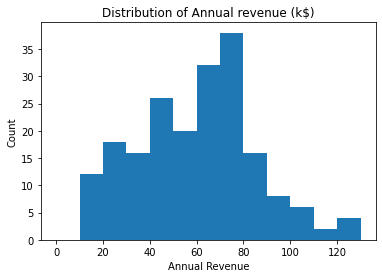

In [12]:
# #Visualizing data points
# sns.relplot(x='Annual Revenue (k$)', y='Spending Score (1-100)', data=data, kind="scatter")
# plt.show()

##Distribution
x = data['Annual Revenue (k$)']
plt.hist(x, bins = np.arange(0,138,10))
plt.ylabel('Count')
plt.xlabel('Annual Revenue')
plt.title('Distribution of Annual revenue (k$)')
plt.show()

**Observation:**<br>
1. The annual Revenue of the Merchants is distributed between USD 10k - 130k ,  and the bin with higher number of Merchants it is the one with an annual revenue between, 70 - 80  (k$)  .<br>

2. Less than 5 Merchants have an annul Revenue between 110 -120 (k$) 


In [13]:
#Most purchased product summary
data[['Annual Revenue (k$)','Spending Score (1-100)','Most Purchased Product']].groupby("Most Purchased Product").mean()

,Annual Revenue (k$),Spending Score (1-100)
Most Purchased Product,,
Fresh Milk 1ltr,53.157895,49.697368
Fresh Milk 250ml,25.095238,80.047619
Mtindi 250ml,85.585366,50.792683
Mtindi 500ml,25.095238,19.857143


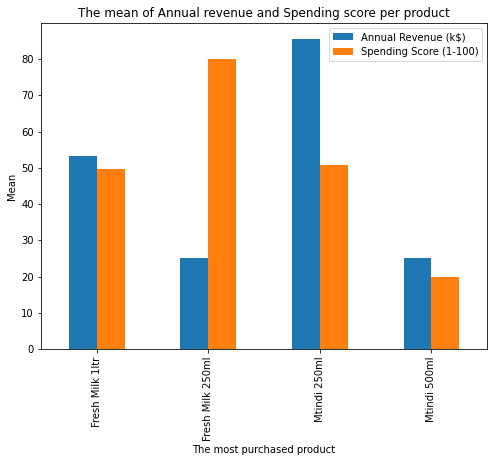

In [14]:
#Visualizing Most purchased product summary
df = data[['Annual Revenue (k$)','Spending Score (1-100)','Most Purchased Product']].groupby("Most Purchased Product").mean()

df.plot(kind='bar', figsize = (8,6))
plt.title("The mean of Annual revenue and Spending score per product")
plt.ylabel("Mean")
plt.xlabel("The most purchased product")
plt.show()

**Observation:**
*  From the plot, Mtindi 250ml brings the highest revenue for the Dododma Fresh Milk <br>
*  Merchants who buy Fresh Milk 250ml have the highest spending score compared to other merchants


In [15]:
#Merchant by City Summary
data[['Annual Revenue (k$)','Spending Score (1-100)','City']].groupby("City").mean()

,Annual Revenue (k$),Spending Score (1-100)
City,,
Dar es Salaam,85.585366,50.792683
Moshi,53.157895,49.697368
Mtwara,25.095238,19.857143
Zanzibar City,25.095238,80.047619


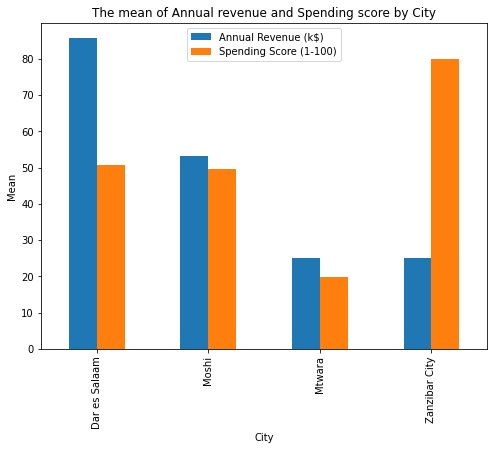

In [16]:
#Merchant by City Summary
df1 = data[['Annual Revenue (k$)','Spending Score (1-100)','City']].groupby("City").mean()
df1.plot(kind='bar', figsize = (8,6))
plt.title("The mean of Annual revenue and Spending score by City")
plt.ylabel("Mean")
plt.xlabel("City")
plt.show()

**Observation:**
*  Merchants from  Dar es Salaam have highest Annual revenue <br>
*  Merchants from Zanzibar City have the highest spending score compared to other merchants from other cities

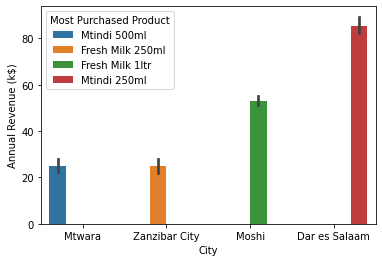

In [17]:
sns.barplot(x ='City',y= 'Annual Revenue (k$)', data = data, hue = 'Most Purchased Product')
plt.show()

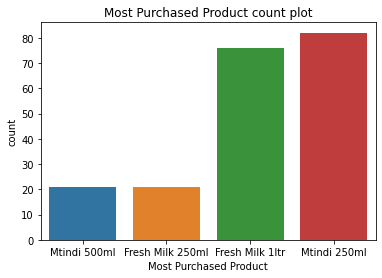

In [18]:
# Most Purchased Product countplot
plt.figure()
sns.countplot(x = 'Most Purchased Product', data = data)
plt.title('Most Purchased Product count plot')
plt.show()

**Observation:**


*  The most purchased product at Dodoma fresh milk is Mtindi 250ml

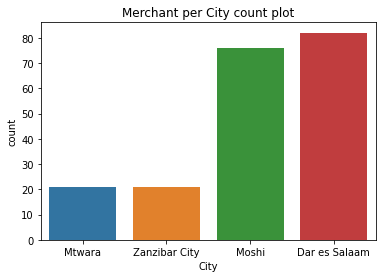

In [19]:
# Mechants per City countplot
plt.figure()
sns.countplot(x = 'City', data = data)
plt.title('Merchant per City count plot')
plt.show()

**Observation**: 

* Majority of the Dodoma fresh milk merchants are from Dar es Salaam Cityfollowed by Moshi City.
* Mtwara and Zanzibar have few and  same number of Merchants

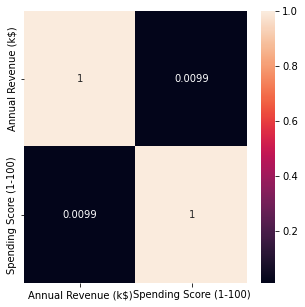

In [20]:
#plotting heat map for correlation
plt.figure(figsize=(5,5))
sns.heatmap(data[["Annual Revenue (k$)","Spending Score (1-100)"]].corr(), annot=True)
plt.show()

**Observation:**
*  There is positive but very weak correlation between the spending score and the annual revenue.


<a name = "process"><a/>
# Section 5: Feature Engineering
This section focus on data processing, such as renaming the variables, removing the least significant variables and one hot encoding for the categorical covariates.



In [21]:
#Renaming columns to shortern them for readability
data.rename(columns = {'Annual Revenue (k$)':'Annual_Revenue', 'Spending Score (1-100)':'Spending_Score','Most Purchased Product':'Product'}, inplace = True)
data.columns

Index(['Merchant Id', 'Annual_Revenue', 'Spending_Score', 'City', 'Product'], dtype='object')

In [22]:
#drop customer Id since we dont need it for modeling
data = data.drop('Merchant Id', axis =1)

One hot encoding:<br>
* To create dummy variables for categorical variables such as **City and product** to make our taining data more useful and expressive for building robust model.

In [23]:
# Step 1: one hot encode the categorical covariate City
one_hot_city = pd.get_dummies(data['City'], prefix='City')

#Step 2: use pd.concat to join the new columns with your original dataframe
data = pd.concat([data, one_hot_city], axis=1)

#Stpe 3: now drop the original City column (you don't need it anymore)
data.drop(['City'], axis=1, inplace=True)

# Step 4: print the resultant dataframe
data.head(3)

,Annual_Revenue,Spending_Score,Product,City_Dar es Salaam,City_Moshi,City_Mtwara,City_Zanzibar City
0,15,39,Mtindi 500ml,0,0,1,0
1,15,81,Fresh Milk 250ml,0,0,0,1
2,16,6,Mtindi 500ml,0,0,1,0


In [24]:
# Step 1: one hot encode the categorical covariate Product
one_hot_product = pd.get_dummies(data['Product'], prefix='Product')

#Step 2: use pd.concat to join the new columns with your original dataframe
data = pd.concat([data, one_hot_product], axis=1)

#Stpe 3: now drop the original City column (you don't need it anymore)
data.drop(['Product'], axis=1, inplace=True)

# Step 4: print the resultant dataframe
data.head()

,Annual_Revenue,Spending_Score,City_Dar es Salaam,City_Moshi,City_Mtwara,City_Zanzibar City,Product_Fresh Milk 1ltr,Product_Fresh Milk 250ml,Product_Mtindi 250ml,Product_Mtindi 500ml
0,15,39,0,0,1,0,0,0,0,1
1,15,81,0,0,0,1,0,1,0,0
2,16,6,0,0,1,0,0,0,0,1
3,16,77,0,0,0,1,0,1,0,0
4,17,40,0,0,1,0,0,0,0,1


<a name = "modeling"><a/>
# Section 6: Model Building and Evaluation


## Customer Segmentaion using Kmeans Technique
Now that we have preprocessed the data, we are ready to build models that will segment the Customers.

In [25]:
#Building the Model using KMeans Algorithm 
#ELBOW Method is used to figure out the optimum number of clusters
cs=[]

#It  always assumed the max number of cluster to be 10
#getting maximum no of clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=1)
    kmeans.fit(data)
    cs.append(kmeans.inertia_)

#inertia_ is the formula used to segregate the data points into clusters

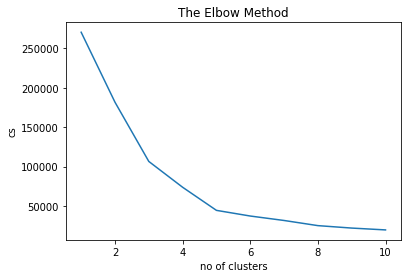

In [26]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), cs)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('cs')
plt.show()

#### To find the appropriate number of clusters, the Elbow method was used and the optimal number of clusters were found to be 5, based on the above graph

In [27]:
#Model Build
cs_model = KMeans(n_clusters= 5, init='k-means++', random_state=1)
pred_kmeans= cs_model.fit_predict(data[['Annual_Revenue', 'Spending_Score']])

In [28]:
pred_kmeans

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [29]:
cluster_data=data.values

### Model EValuation
Silhouette score metric is used to evaluate the quality of clusters created by Kmeans algorithm.

In [30]:
#Model Evaluation
#Printing the silhouette score of this model
print(silhouette_score(cluster_data, kmeans.labels_, metric='euclidean'))

0.44708939538189624


The Score is 0.447 which is good perfomance and implies that the model can generalized well on unseen data.

For the best result more data can be gathered for modeling.

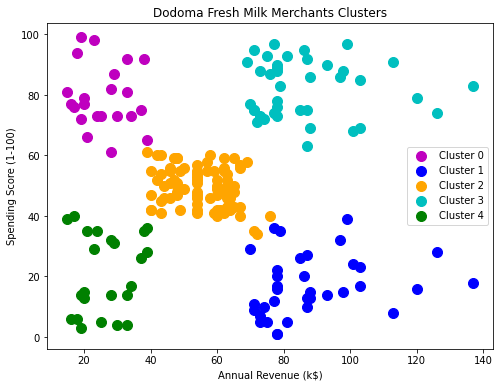

In [31]:
#Visualizing all the clusters in graph
plt.figure(figsize=(8,6)) 
plt.scatter(cluster_data[pred_kmeans == 0, 0], cluster_data[pred_kmeans == 0, 1], s = 100, c = 'm', label = 'Cluster 0')
plt.scatter(cluster_data[pred_kmeans == 1, 0], cluster_data[pred_kmeans == 1, 1], s = 100, c = 'b', label = 'Cluster 1')
plt.scatter(cluster_data[pred_kmeans == 2, 0], cluster_data[pred_kmeans == 2, 1], s = 100, c = 'Orange', label = 'Cluster 2')
plt.scatter(cluster_data[pred_kmeans == 3, 0], cluster_data[pred_kmeans == 3, 1], s = 100, c = 'c', label = 'Cluster 3')
plt.scatter(cluster_data[pred_kmeans == 4, 0], cluster_data[pred_kmeans == 4, 1], s = 100, c = 'g', label = 'Cluster 4')
plt.title('Dodoma Fresh Milk Merchants Clusters')
plt.xlabel('Annual Revenue (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [32]:
# Visualizing Clusters in a dataframe
labels = pd.DataFrame(cs_model.labels_)
Merchant_cluster = data.assign(Cluster=labels)

# Grouping and display the clusters
Merchant_cluster.groupby(['Cluster']).mean().round()

,Annual_Revenue,Spending_Score,City_Dar es Salaam,City_Moshi,City_Mtwara,City_Zanzibar City,Product_Fresh Milk 1ltr,Product_Fresh Milk 250ml,Product_Mtindi 250ml,Product_Mtindi 500ml
Cluster,,,,,,,,,,
0,26.0,79.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,88.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,55.0,50.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,87.0,82.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,26.0,21.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### **Model Result**
**Cluster 0**: 
*  Low Revenue, High Spending Score 
*  City is Zanzibar and their most purchased product is Fresh Milk 250ml


**Cluster 1**: 
*  High Revenue, Low Spending Score
*  City is Dar es Salaam and the most purchased product is Mtindi 250ml


**Cluster 2**: 

* Average Revenue and Spending Score 
* City is Moshi and the most purchased product is Fresh Milk 1ltr

**Cluster 3**:

*  High Revenue, high spending score
*  City is Dar es Salaam and the most purchased product is Mtindi 250ml

**Cluster 4**:

*  Low Revenue, Low spending Score
*  ity is Mtwara and the most purchased product is Mtindi 500ml

<a name = "interpreatation"><a/>

# Section 7:Model Interpretation and Recommendations

**Cluster 0: The Magenta Color**


> This cluster comprises with Merchants who have low Annual Revenue but high spending score, They are from Zanzibar. They might be well satsfied with the product and services from the distributor.


> The Distributor may consider to continue giving them high quality service and product together with offers like  discount of the products to retain them.



**Cluster 1: The Blue Color**


> This cluster have Merchants with high revenue and low spending score. This group might be supplied with other brands given they are from Dar es Salaam which is the center of businesses, or they are unsatisfied with the product and services of the disributor.

>This group should be the target to the Distributor and the following can be done
*  Doing a reaserch to this group to find out what product or service they are interest to.
*  Advertisments, promotions, offers and discount rates can be done to increase their spending score


**Cluster 2 : The Orange Color**

> This Cluster have Merchants with average annual revenue and average spending score and are from Moshi. These may be the merchant who are satsfied with their businesses and they don't see the reason to grow their business and inceaase incease revenue.
> They may not be the target group but the distributor need to retain them through advertisments, promotions and offers to boost their spending score. 

**Cluster 3: The Cyan Color**

> This cluster have Merchants with High Revenue and High Spending Score and are from Dar es Salaam. They seem to be well satsfied with the product and services from Dodoma Fresh Milk.
> This is the Prime Target to the distributor and more Marketing should be done this group by introducing new product to them and maintain standards to keep them satsfied. 

**Cluster 4 : The Green Color**
> The Merchant in this cluster have low annual revenue and low spending score and they are from Mtwara. These may be those who are starting business or it is because of the nature of the City they are coming from, their economic status and the distance from the distributors.  
>This group can be of least interest to the distributor though Marketing cheaper product to them and locating the service closer to them can be ideal to retain them.







<a name = "conlusion"><a/>
# Section 8 : Conclusion

With the application of K-means clustering technique and the Elbow method that was used to determine the optimal number of clusters we are confident to conclude that:

*  Dodoma Fresh milk should target Merchants from Cluster 0 and cluster 3 by maintaining the quality and standard of their product to keep them satsfied as they have high spending score.

*  To increase sales and profit Dodoma Fresh Milk should also target cluster 1 and cluster 2 by allocating advertisments and promotions spend to this groups to boost their spending score

